<a href="https://colab.research.google.com/github/atharvv8/Time-Series/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd
from datetime import datetime

In [3]:
start_date = datetime(2018, 8, 11)
end_date = datetime(2023, 8, 11)

In [4]:
df_tesla = yf.download('TSLA', start=start_date, end=end_date)
df_tesla

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-13,24.075333,24.212667,23.268000,23.760668,23.760668,156958500
2018-08-14,23.896667,23.946667,23.139999,23.176001,23.176001,104796000
2018-08-15,22.794001,22.966000,22.142668,22.579332,22.579332,136519500
2018-08-16,22.660667,22.818666,22.254667,22.363333,22.363333,90960000
2018-08-17,21.566668,21.784666,20.235332,20.366667,20.366667,284379000
...,...,...,...,...,...,...
2023-08-04,260.970001,264.769989,253.110001,253.860001,253.860001,99242600
2023-08-07,251.449997,253.649994,242.759995,251.449997,251.449997,111097900
2023-08-08,247.449997,250.919998,245.009995,249.699997,249.699997,96642200


In [5]:
df_tesla.to_csv('TSLA.csv')

<Axes: xlabel='Date'>

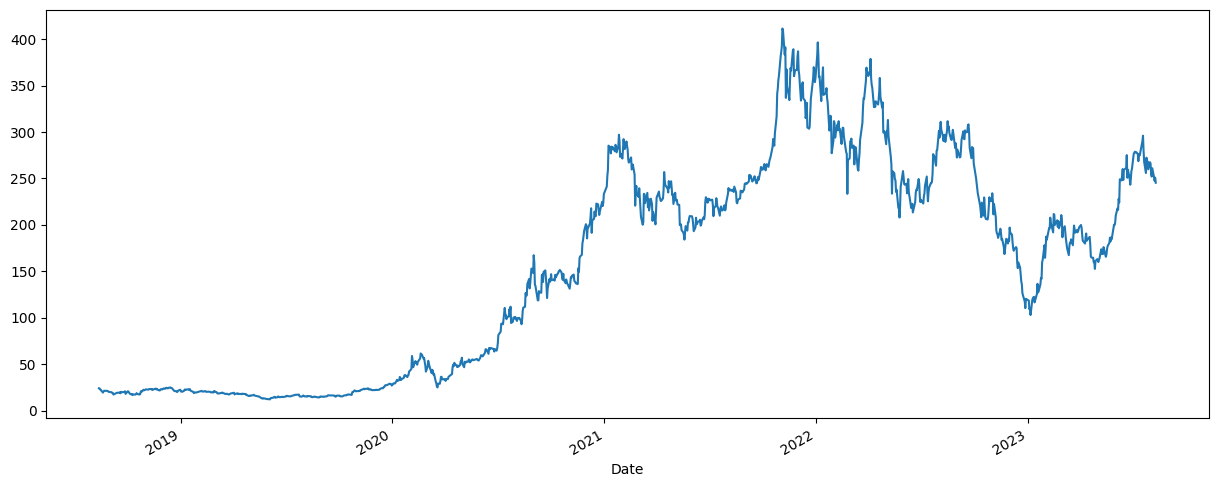

In [6]:
df_tesla['Open'].plot(figsize=(15,6))

In [7]:
df_tesla['Open:10 days rolling']=df_tesla['Open'].rolling(window=10,min_periods=1).mean()#Simple Moving average

<Axes: xlabel='Date'>

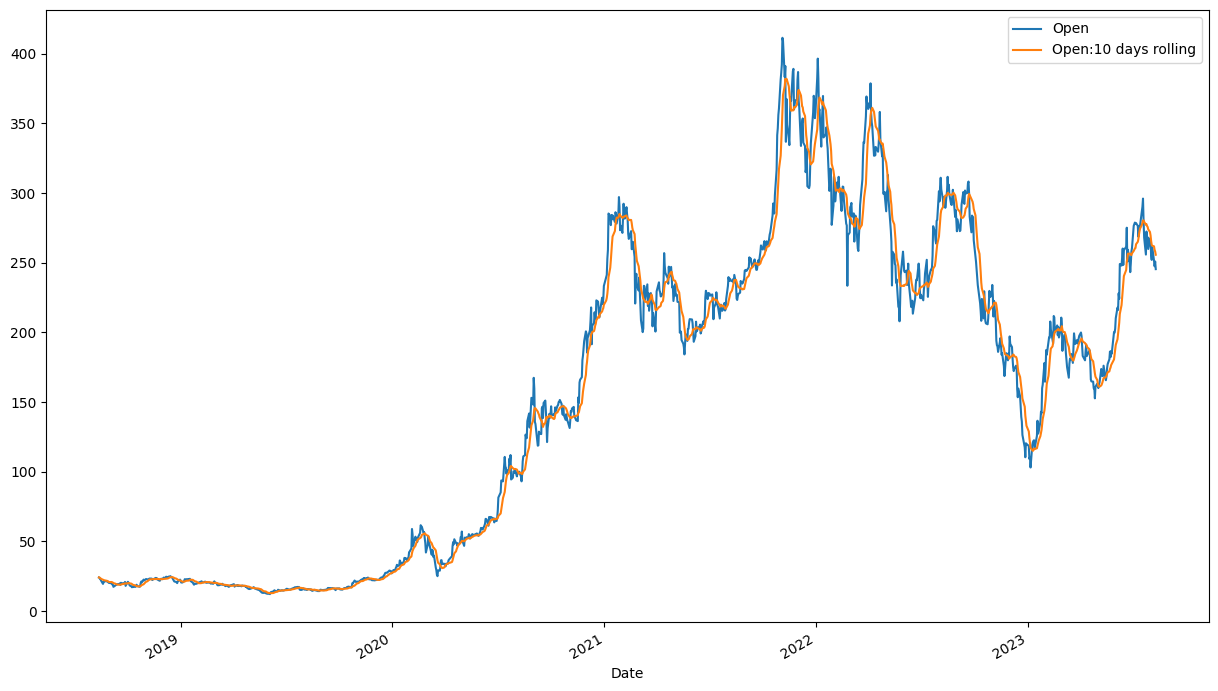

In [8]:
df_tesla[['Open','Open:10 days rolling']].plot(figsize=(15,9))

In [9]:
df_tesla['Open:30 days rolling']=df_tesla['Open'].rolling(window=30,min_periods=1).mean()
df_tesla['Open:50 days rolling']=df_tesla['Open'].rolling(window=50,min_periods=1).mean()

<Axes: xlabel='Date'>

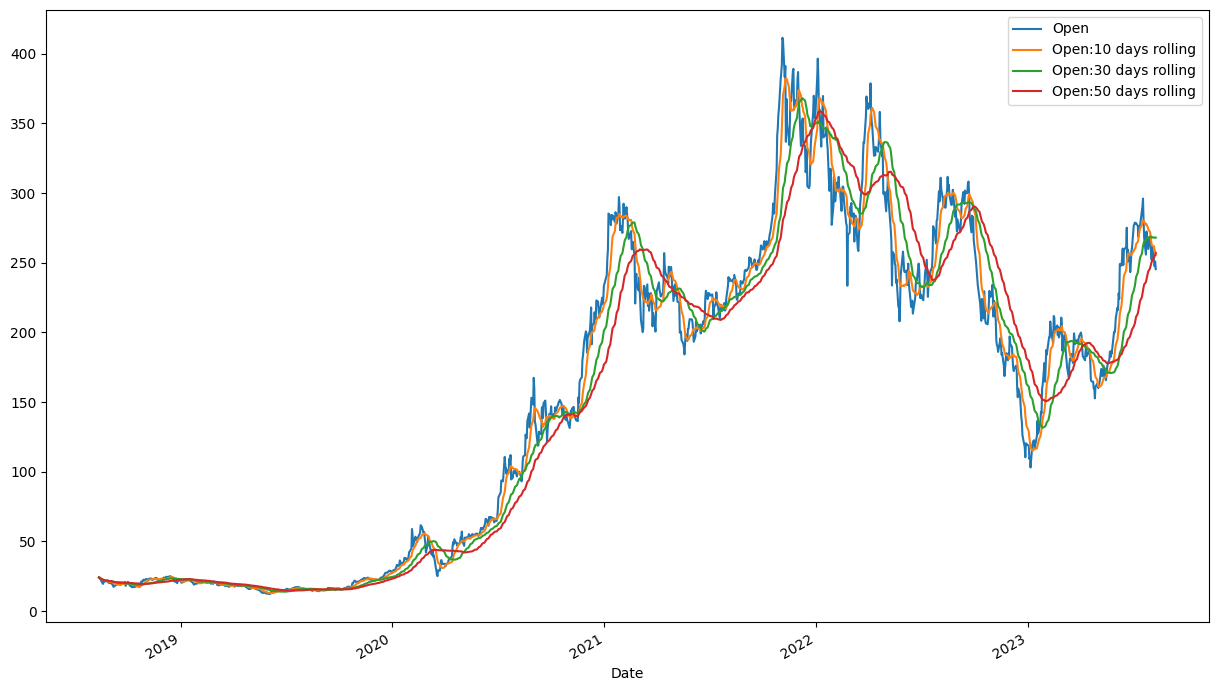

In [10]:
df_tesla[['Open','Open:10 days rolling','Open:30 days rolling','Open:50 days rolling']].plot(figsize=(15,9))

<Axes: xlabel='Date'>

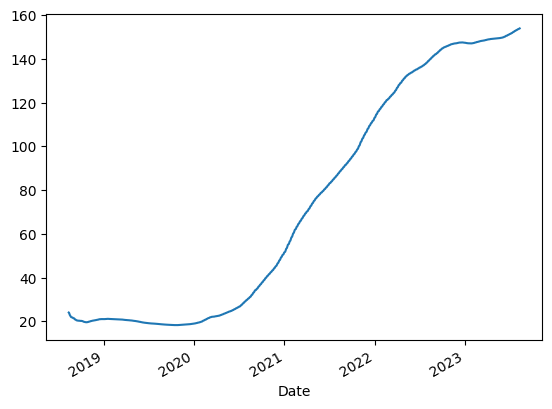

In [11]:
#Cummulative Moving average
df_tesla['Open'].expanding().mean().plot()

In [16]:
#Exponential Moving Average
#Let smoothening factor be 0.1
df_tesla['EMA_0.1']= df_tesla['Open'].ewm(alpha=0.1, adjust= False).mean()

<Axes: xlabel='Date'>

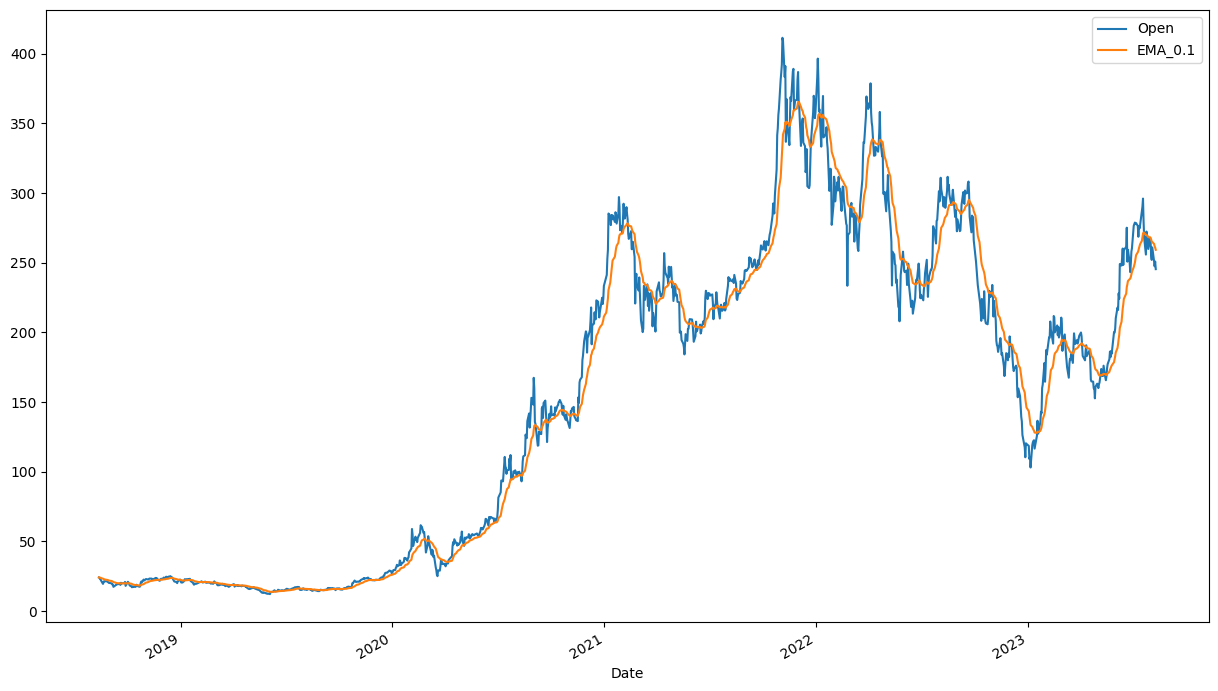

In [17]:
df_tesla[['Open','EMA_0.1']].plot(figsize=(15,9))

In [19]:
#Exponential Weighted Moving Average
df_tesla['EWMA_5days']= df_tesla['Open'].ewm(span=5).mean()

<Axes: xlabel='Date'>

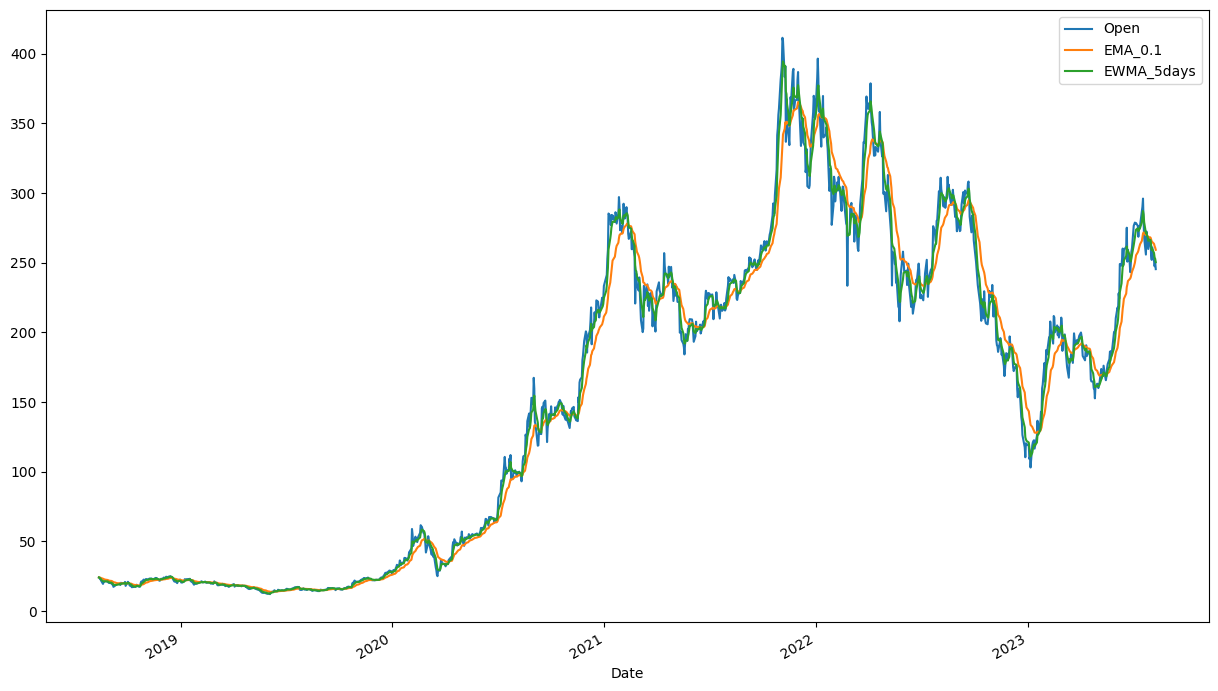

In [20]:
df_tesla[['Open','EMA_0.1','EWMA_5days']].plot(figsize=(15,9))